In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

In [2]:
from sklearn.datasets import load_boston
boston_dataset=load_boston()
print(type(boston_dataset))

<class 'sklearn.utils.Bunch'>


In [19]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
print(boston_dataset.keys())
print(boston_dataset["feature_names"])
print(boston_dataset["DESCR"])

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employ

#### lets see how the number of rooms (RM) affects the price (MEDV) in the linear regression, MEDV will be our Y value. RM will be our x value.

In [27]:
# Prepare the data

from sklearn.model_selection import train_test_split
num_rooms_train,num_rooms_test,med_price_train,med_price_test=train_test_split(boston_dataset.data[:,5].reshape(-1,1),boston_dataset.target.reshape(-1,1))
print(num_rooms_train.shape)
print(med_price_train.shape)
print(num_rooms_test.shape)
print(num_rooms_test[0])

(379, 1)
(379, 1)
(127, 1)
[6.162]


In [26]:
# implement linear regression model

from sklearn.linear_model import LinearRegression 
price_room=LinearRegression()
print(type(price_room))
price_room.fit(num_rooms_train,med_price_train)

<class 'sklearn.linear_model.base.LinearRegression'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# predict on linear regression model

print(price_room.predict(num_rooms_test[0].reshape(-1,1)))
print(price_room.predict(num_rooms_test[5].reshape(-1,1)))
print(price_room.predict(num_rooms_test[1:10]))
med_price_pred=price_room.predict(num_rooms_test)


[[22.54613688]]
[[25.79343432]]
[[23.94918115]
 [24.13448889]
 [25.31692872]
 [22.51966435]
 [25.79343432]
 [36.11772238]
 [26.37583006]
 [19.74887251]
 [23.56091733]]


In [28]:
num_rooms_test[0].reshape(-1,1)

array([[6.162]])

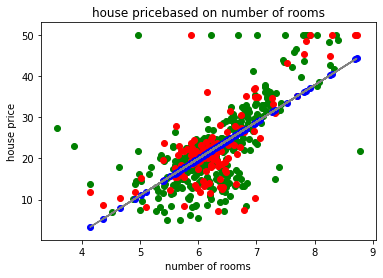

In [18]:
# plotting the model

plt.scatter(num_rooms_train,med_price_train,color="green")
plt.scatter(num_rooms_test,med_price_test,color="red")
plt.scatter(num_rooms_test,med_price_pred,color="blue")
plt.plot(num_rooms_test,price_room.predict(num_rooms_test),color="gray")
plt.title("house pricebased on number of rooms")
plt.xlabel("number of rooms")
plt.ylabel("house price")
plt.show()